In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
n = 2000
x = (np.arange(n)[None]/n - 0.75) * 2
y = (np.arange(n)[:, None]/n - 0.5) * 2

def square(z):
    x, y = z
    return (x**2 - y**2, x*y + y*x)

def abs_value(z):
    x, y = z
    return (x ** 2 + y ** 2) ** (1/2)

def plus(z, y):
    return (z[0]+y[0], z[1] + y[1])

def mandlebrot(z, c, iterations=100, threshold=100):
    f = (0, 0)
    for i in range(iterations):
        f = plus(square(f), c)
    return abs_value(f) < threshold

# im = mandlebrot(0, (x, y))
# plt.imshow(im)



4.048562049865723


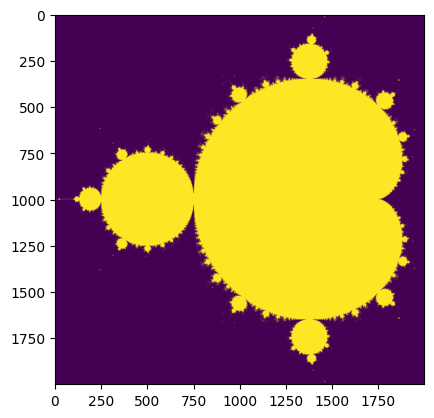

In [72]:
import warnings
warnings.filterwarnings("ignore")
import time

start = time.time()
im = mandlebrot(0, (x, y))
plt.imshow(im)
print(time.time() - start)


1.7982511520385742


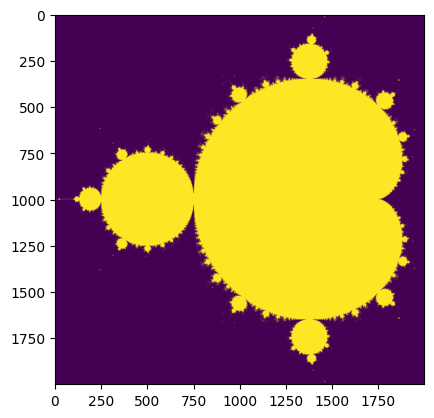

In [73]:

from multiprocessing import Pool

start = time.time()
n_workers = 10
n_sliced = y.shape[0] // n_workers
with Pool(n_workers) as p:
    ims = p.starmap(mandlebrot, [(0, (x, y[n_sliced * i:n_sliced*(i+1)])) for i in range(n_workers)])

im = np.concatenate(ims,0)
print(time.time() - start)
plt.imshow(im)

    



1.8630914688110352


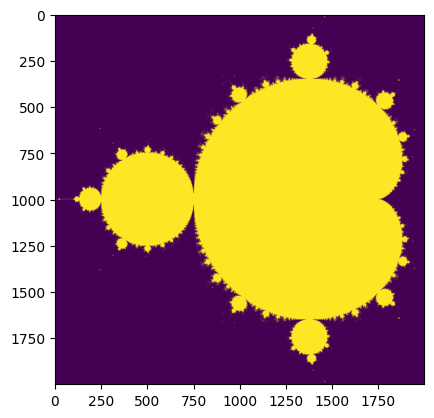

In [79]:
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor

import warnings
warnings.filterwarnings("ignore")
import time


start = time.time()
n_workers = 10
n_sliced = y.shape[0] // n_workers
with ProcessPoolExecutor(n_workers) as p:
    ims = list(p.map(mandlebrot, [0 for i in range(n_workers)], [(x, y[n_sliced * i:n_sliced*(i+1)]) for i in range(n_workers)]))

im = np.concatenate(ims,0)
print(time.time() - start)
plt.imshow(im)



In [76]:
ims

<generator object Executor.map.<locals>.result_iterator at 0x7f019c2d86d0>